In [2]:
!pip3 install transformers

In [4]:
!pip install transformers

In [3]:
!python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('we love you'))"

2024-01-01 01:11:37.331935: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 01:11:37.332017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 01:11:37.333760: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 01:11:38.690965: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision 

In [2]:
from transformers import pipeline


In [5]:

transcriber = pipeline(task="automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.masked_spec_embed', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You sho

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

In [6]:
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

{'text': 'I HAVE A DREAM BUT ONE DAY THIS NATION WILL RISE UP LIVE UP THE TRUE MEANING OF ITS TREES'}

In [7]:
transcriber = pipeline(model="openai/whisper-large-v2")
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.17G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/4.26k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}

In [8]:
transcriber(
    [
        "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac",
        "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/1.flac",
    ]
)

[{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'},
 {'text': ' He hoped there would be stew for dinner, turnips and carrots and bruised potatoes and fat mutton pieces to be ladled out in thick, peppered, flour-fattened sauce.'}]

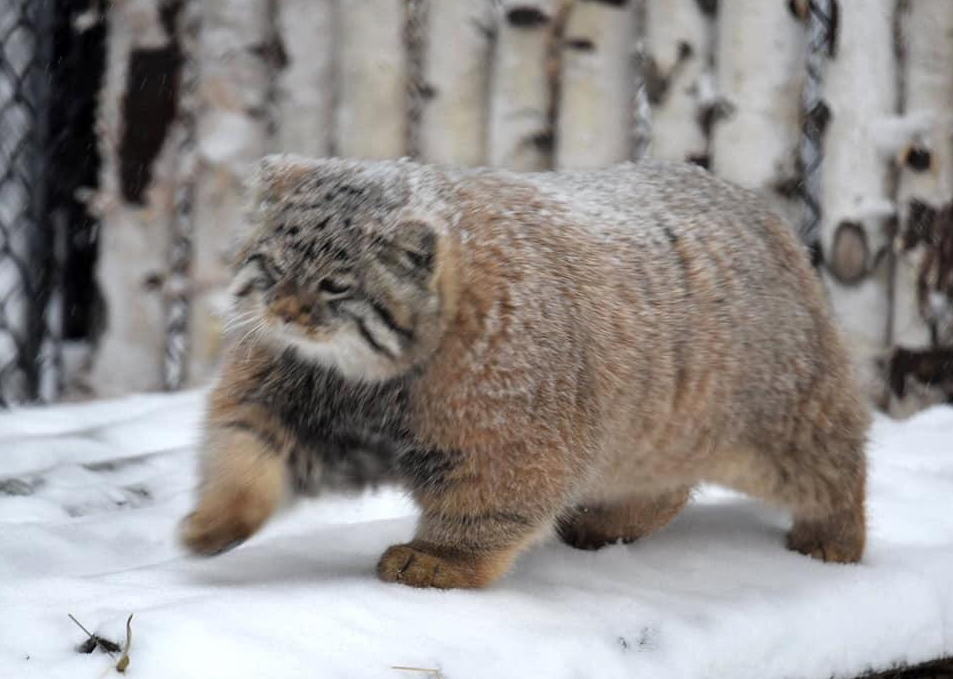

In [4]:
from transformers import pipeline

vision_classifier = pipeline(model="google/vit-base-patch16-224")
preds = vision_classifier(
    images="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
preds

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

[{'score': 0.4335, 'label': 'lynx, catamount'},
 {'score': 0.0348,
  'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'},
 {'score': 0.0324, 'label': 'snow leopard, ounce, Panthera uncia'},
 {'score': 0.0239, 'label': 'Egyptian cat'},
 {'score': 0.0229, 'label': 'tiger cat'}]

In [15]:
from transformers import pipeline

# This model is a `zero-shot-classification` model.
# It will classify text, except you are free to choose any label you might imagine
classifier = pipeline(model="facebook/bart-large-mnli")
classifier(
    "I have a problem with my iphone that needs to be resolved asap!!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5036354660987854,
  0.47879987955093384,
  0.012600123882293701,
  0.0026557897217571735,
  0.0023087516892701387]}

 Multimodal pipeline

The pipeline() supports more than one modality. For example, a visual question answering (VQA) task combines text and image. Feel free to use any image link you like and a question you want to ask about the image. The image can be a URL or a local path to the image.

For example, if you use this invoice image:

In [17]:
!sudo apt install -y tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,025 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

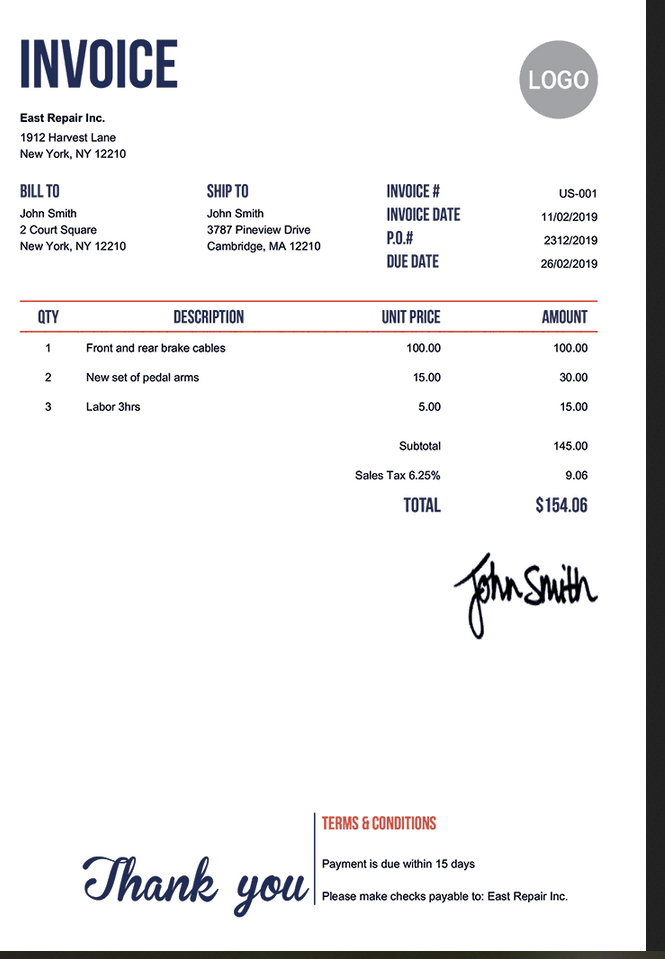

In [1]:
from transformers import pipeline

vqa = pipeline(model="impira/layoutlm-document-qa")
vqa(
    image="https://huggingface.co/spaces/impira/docquery/resolve/2359223c1837a7587402bda0f2643382a6eefeab/invoice.png",
    question="What is the invoice number?",
)

[{'score': 0.42514568567276, 'answer': 'us-001', 'start': 16, 'end': 16}]

 Using pipeline on large models with 🤗 accelerate :

In [3]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 3.1 MB/s eta 0:00:00


In [1]:
# pip install accelerate
import torch
from transformers import pipeline

pipe = pipeline(model="facebook/opt-1.3b", torch_dtype=torch.bfloat16, device_map="auto")
output = pipe("This is a cool example!", do_sample=True, top_p=0.95)

pytorch_model.bin:   0%|          | 0.00/2.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]